###  2. Logistic Regression

We will use 'Titanic Data Set from Kaggle' to do passengers classification of survival or deceased.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

## Reading the Data

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass - passenger class,<br>
SibSp - siblings or spouse

## Exploratory Data Analysis

## Checking Missing Data

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

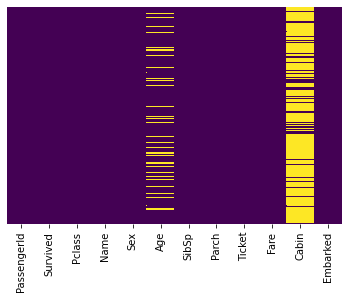

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In the above heatmap the yellow color shows the null values. which means we are missing some age information, a lot of cabin information and about 2 rows of Embarked information.

In [6]:
sns.set_style('whitegrid') #to have white grid background on the plots

<AxesSubplot:xlabel='Survived', ylabel='count'>

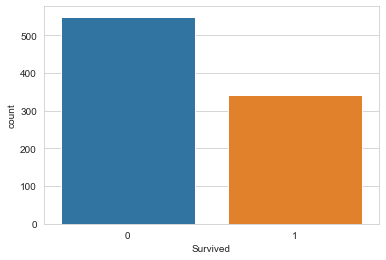

In [7]:
# Survived has discrete(int) values
#sns.countplot(x='Survived', data=train, palette='RdBu_r')
sns.countplot(x='Survived', data=train) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

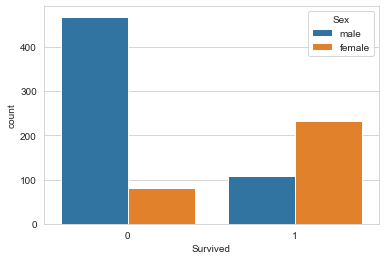

In [8]:
# Sex has only 2 values
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

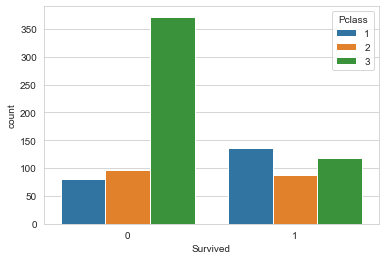

In [9]:
# Pclass has discrete(int) values
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

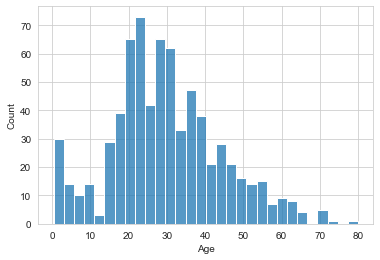

In [10]:
# Age has continuous (float) values
sns.histplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

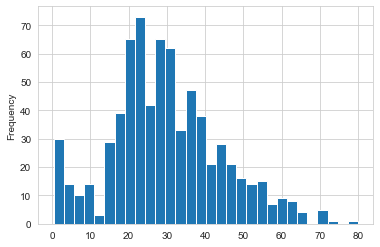

In [11]:
#or we can just use pandas visualization to plot histogram
#train['Age'].hist(bins=30,color='darkred',alpha=0.7)
train['Age'].plot.hist(bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

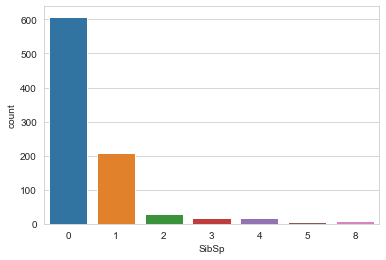

In [13]:
# SibSp has discrete(int) values
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

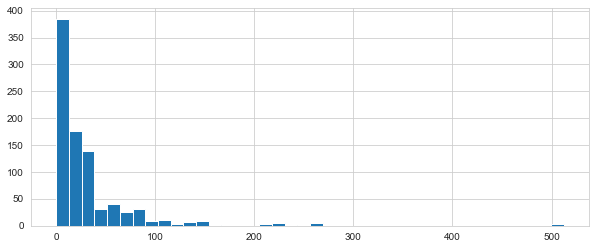

In [14]:
# Fare has continuous (float) values
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
train['Fare'].hist(bins=40, figsize=(10,4))

### Cufflinks for plots

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

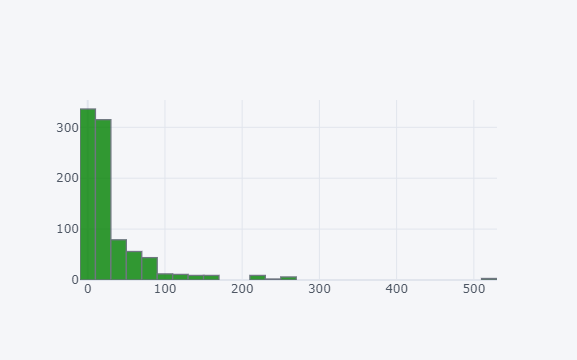

In [17]:
train['Fare'].iplot(kind='hist',bins=30,color='green')
#train['Fare'].iplot(kind='hist',bins=50)

## Data Cleaning

We want to fill in the missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

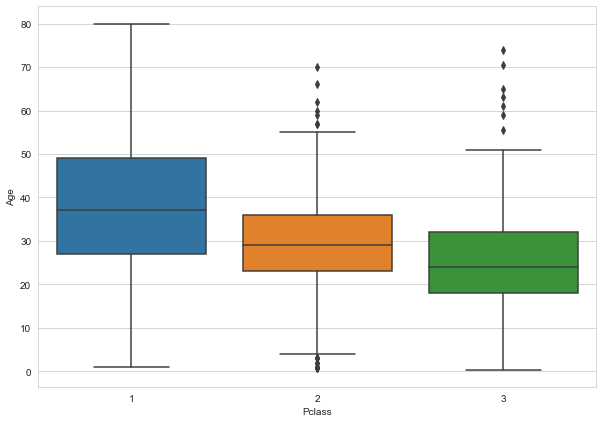

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.<br>
In statistics, imputation is the process of replacing missing data with substituted values.

We can find the exact average age by Pclass values. For this we can calculate the mean Age grouping by Pclass.<br>
Or we can create boxplot using plotly to see the detail (min, q1, median, q3 and max) values. point to the box plots to see these values.

In [20]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

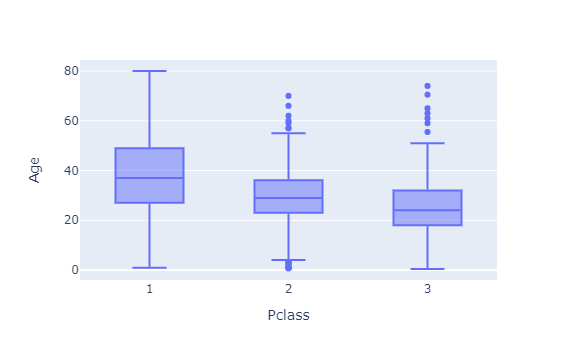

In [21]:
import plotly.express as px
#train = px.data.tips()
fig = px.box(train, x="Pclass", y="Age")
fig.show()

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): #if age is null

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age #if age is not null

Now apply that function!

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) 
#when we apply the fun impute_age on train[['Age','Pclass']] it takes the list 
#['Age','Pclass'] as cols argument.
#axis=1 is columns

Now let's check that heat map again!

<AxesSubplot:>

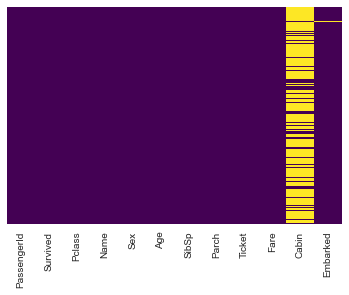

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we don't have any missing information on the age column.<br>
Great! Let's drop the Cabin column and the row in Embarked that is NaN.

In [25]:
train.drop('Cabin',axis=1,inplace=True) #axis=1 is column

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

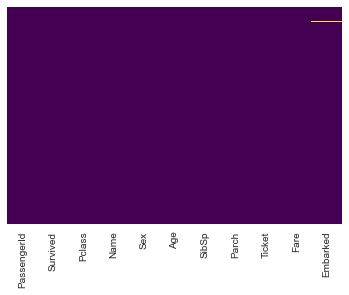

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
train.dropna(inplace=True)

<AxesSubplot:>

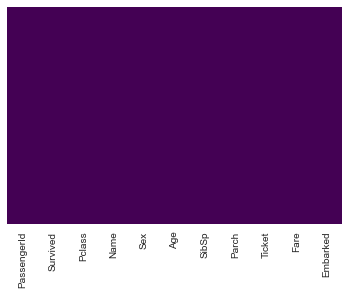

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [31]:
pd.get_dummies(train['Sex'])
# in this case one column is perfect predictor of the other. 
# if we feed this cols to our machine  learning algorithm it says if it is 0
# at female col i can predict perfectly that it will be 1 at male.
# this is going to be an issue known as multicollinearity 
# (it will messup the algorithm). To avoid this we can drop the first col.

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [32]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [33]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [34]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [35]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
train = pd.concat([train,sex,embark],axis=1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [39]:
#dropping the columns that we don't need for our model
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
train.tail() #to see our dataframe 5 elements from the last row up  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


PassengerId is an index it is not usefull for us to predict whether a passenger survived based on their posision(their index).

In [42]:
train.drop('PassengerId', axis=1, inplace=True)

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now everything is numerical. but one more thing we should see the Pclass column that is a catagorical variable. We can train our model with this feature as it is and in another case we can convert it to dummy variables and train our model and see the difference. 

In [44]:
#pd.get_dummies(train['Pclass'])
Pclass = pd.get_dummies(train['Pclass'],drop_first=True)
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


For now let's not concatenate it to our train data set

In [45]:
#train[train['SibSp']==8] #just want to check SibSp column's values

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that we can play around with in case we want to use all this data for training). <br>

Note: if we want to use titanic_test.csv file, we should clean it just like we did for the training data set

## Train Test Split

In [46]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training and Predicting

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

C:\Users\tizit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [52]:
predictions = logmodel.predict(X_test)

## Evaluation

We can use classification report to check precision, recall, f1-score accuracy etc.

In [54]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



If we want the pure confusion matrix we can use the following

In [65]:
#from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [66]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

True Negetive(TN) = 147
True positive(TP) = 74
False Negative(FN) = 30
False Positive(FP) = 16

In [73]:
Accuracy = metrics.accuracy_score(y_test, predictions)
Accuracy

0.8277153558052435